<a href="https://colab.research.google.com/github/TheLast20/Red-Neuronal/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

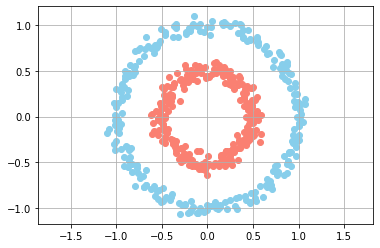

In [80]:
#Creamos el DataSET
n = 500
p = 2

X,Y = make_circles(n_samples=n,factor=0.5,noise=0.05)

plt.scatter(X[Y == 0,0],X[Y == 0,1],c="skyblue")
plt.scatter(X[Y == 1,0],X[Y == 1,1],c="salmon")
plt.axis("equal")

plt.grid()
plt.show()

In [73]:
class neural_layer():
  def __init__(self,n_comn,n_neur,act_f):
    self.act_f = act_f
    self.b = np.random.rand(1,n_neur)*2 -1
    self.W = np.random.rand(n_comn,n_neur)*2 -1


In [74]:
#FUNCIONES DE ACTIVACION

sigm = (lambda x: 1/(1+np.e**(-x)),
        lambda x: x*(1-x))


In [103]:


def create_nn(topology,act_f):
  nn = []
  for l,layer in enumerate(topology[:-1]):
    nn.append(neural_layer(topology[l],topology[l+1],act_f))
  return nn

topology = [p,4,8,16,8,4,1]
neural_net = create_nn(topology,sigm)

l2_cost = (lambda Yp, Yr: np.mean(((Yp-Yr)**2)),
           lambda Yp, Yr: (Yp - Yr))


def train(neural_net,X,Y,l2_cost,lr=0.5,train = True):
  out = [(None,X)]
  for l,layer in enumerate(neural_net):
    z = out[-1][1]@neural_net[l].W +  neural_net[l].b
    a = neural_net[l].act_f[0](z)
    out.append((z,a))

  if train:
    deltas = []

    for l in reversed(range(len(neural_net))):
      z = out[l+1][0]
      a = out[l+1][1]
      print(a.shape)

      if l == len(neural_net)-1:
        deltas.insert(0,l2_cost[1](a,Y)*neural_net[l].act_f[1](a))
      
      else:
        deltas.insert(0,deltas[0]@neural_net[l+1]._W*neural_net[l].act_f[1](a))

    _W = eural_net[l+1].W

    neural_net[l].b = neural_net[l].b - np.mean(deltas[0],axis = 0,keepddims = True) *lr
    neural_net[l].W = neural_net[l].W - out[l]deltas[0]*lr



train(neural_net,X,Y,l2_cost,0.5)

(500, 1)


AttributeError: ignored